# Prompting for un/rhyming poems

## Setting prompts and models

Edit `PROMPTS` and `MODEL_LIST` in `constants.py` to change prompts and models.

In [1]:
# Imports
import sys
sys.path.append('../')
from generative_formalism import *

### Setting prompts

In [2]:
documentation(describe_prompts, signature=False)

**Documentation for `describe_prompts`**

*Description*

```md
Print a description of the prompts with statistics and details.
    
    Args:
        prompts: List of prompt strings to describe. Defaults to PROMPT_LIST.
        prompt_to_type: Dictionary mapping prompts to their types. Defaults to PROMPT_TO_TYPE.
    
```

In [3]:
# PROMPT_LIST = ''
# PROMPT_TO_CATEGORY = {}

describe_prompts(
    prompts=PROMPT_LIST,
    prompt_to_type=PROMPT_TO_TYPE
)

* 23 unique prompts
* 3 prompt types

* List of prompts:
  ['Write a poem in ballad stanzas.',
 "Write an ryhmed poem in the style of Shakespeare's sonnets.",
 'Write a long poem that does rhyme.',
 'Write a poem in the style of Emily Dickinson.',
 'Write a poem in heroic couplets.',
 'Write an rhyming poem.',
 'Write a poem (with 20+ lines) that rhymes.',
 'Write a poem that does rhyme.',
 'Write a short poem that does rhyme.',
 'Write a poem that does NOT rhyme.',
 'Write a poem (with 20+ lines) that does NOT rhyme.',
 'Write a long poem that does NOT rhyme.',
 'Write a poem in the style of Walt Whitman.',
 'Write a poem in free verse.',
 'Write a poem in blank verse.',
 'Write an unrhymed poem.',
 'Write a short poem that does NOT rhyme.',
 'Write a poem (with 20+ lines).',
 'Write a long poem.',
 'Write a poem in groups of two lines.',
 'Write a poem.',
 'Write a poem in stanzas of 4 lines each.',
 'Write a short poem.']

* List of prompt types:
  {'DO_rhyme': ['Write a poem in bal

### Setting models

In [4]:
# Prompts

# To override:

# MODEL_LIST = ''
# MODEL_TO_NAME = {}
# MODEL_TO_TYPE = {}

describe_models(models=MODEL_LIST, model_to_type=MODEL_TO_TYPE)

* 11 models (counting parameter changes)
  * 6 model types (ChatGPT, Claude, DeepSeek, Gemini, Llama, Olmo)
  * Using models:
  {   'ChatGPT': ['gpt-3.5-turbo', 'gpt-4-turbo'],
    'Claude': [   'claude-3-haiku-20240307',
                  'claude-3-opus-20240229',
                  'claude-3-sonnet-20240229'],
    'DeepSeek': ['deepseek/deepseek-chat'],
    'Gemini': ['gemini-pro'],
    'Llama': ['ollama/llama3.1:70b', 'ollama/llama3.1:8b'],
    'Olmo': ['ollama/olmo2', 'ollama/olmo2:13b']}
  


## Data


### As in paper

In [8]:
documentation(preprocess_rhyme_promptings,signature=False )
documentation(postprocess_rhyme_promptings,signature=False)
documentation(get_genai_rhyme_promptings_as_in_paper,signature=False)

**Documentation for `preprocess_rhyme_promptings`**

*Description*

```md
Preprocess rhyme promptings data.
    
    This function preprocesses rhyme promptings data from legacy pickle and JSON files,
    combines them, and saves to CSV format.
    
    Args:
        overwrite (bool, optional): Whether to overwrite existing processed data.
            Defaults to False.
        save_to (str, optional): Path to save the processed data.
            Defaults to PATH_GENAI_PROMPTS_IN_PAPER.

    Returns:
        pd.DataFrame: Preprocessed data as a dataframe.
    
```

**Documentation for `postprocess_rhyme_promptings`**

*Description*

```md
Postprocess rhyme promptings data.
    
    This function postprocesses rhyme promptings data by cleaning the text,
    setting the prompt type, and filtering the data by prompt and model.
    
    Args:
        df_prompts (pd.DataFrame): Input DataFrame containing rhyme promptings data.
        prompts (list, optional): List of prompts to include.
            Defaults to PROMPT_LIST.
        models (list, optional): List of models to include.
            Defaults to MODEL_LIST.
        min_lines (int, optional): Minimum number of lines for filtering.
            Defaults to MIN_NUM_LINES.
        max_lines (int, optional): Maximum number of lines for filtering.
            Defaults to MAX_NUM_LINES.
        save_to (str, optional): Path to save the processed data.
            Defaults to None.
        overwrite (bool, optional): Whether to overwrite existing processed data.
            Defaults to False.
        display (bool, optional): Whether to display the processed data.
            Defaults to False.
        **display_kwargs: Additional keyword arguments passed to display_rhyme_promptings.
    
    Returns:
        pd.DataFrame: Postprocessed data as a dataframe.
    
```

**Documentation for `get_genai_rhyme_promptings_as_in_paper`**

*Description*

```md

    Convenience function calling `preprocess_rhyme_promptings` and `postprocess_rhyme_promptings`.
    
    Args:
        overwrite (bool, optional): Whether to overwrite existing processed data.
            Defaults to False.
        save_to (str, optional): Path to save the processed data.
            Defaults to PATH_GENAI_PROMPTS_IN_PAPER.

    Returns:
        pd.DataFrame: Postprocessed data as a dataframe.
    
```

In [9]:
df_rhyme_promptings_in_paper = get_genai_rhyme_promptings_as_in_paper()
df_rhyme_promptings_in_paper

##### Aggregated and filtered

* 17,988 generated responses
* 16,935 unique responses
* 16,871 unique poems
* 23 unique prompts
* 3 unique prompt types


,prompt_type,prompt,model,temperature,txt,num_lines
id,,,,,,
4e7424cc,MAYBE_rhyme,Write a long poem.,claude-3-sonnet-20240229,0.966428,"In the vast expanse of the cosmos sublime,\nWh...",40
631903eb,do_NOT_rhyme,Write a poem (with 20+ lines) that does NOT rh...,gpt-3.5-turbo,1.425594,"In the stillness of morning, the sun breaks th...",32
352c95dc,MAYBE_rhyme,Write a poem.,deepseek/deepseek-chat,0.700000,"Beneath the sky of endless blue, \nWhere drea...",24
0a3a9097,do_NOT_rhyme,Write a poem in blank verse.,claude-3-sonnet-20240229,0.110389,"The sun's warm rays caress the verdant earth,\...",14
e8f5519e,DO_rhyme,Write a poem that does rhyme.,gpt-3.5-turbo,1.336511,"In the heart of the forest, the trees stand ta...",20
...,...,...,...,...,...,...
e79d0184,DO_rhyme,Write a poem that does rhyme.,claude-3-haiku-20240307,0.681941,"On a warm summer day, \nThe gentle breeze does...",12
048f3f28,MAYBE_rhyme,Write a poem (with 20+ lines).,deepseek/deepseek-chat,0.700000,"Beneath the sky where twilight weaves its hue,...",28
5ba13322,DO_rhyme,Write a poem (with 20+ lines) that rhymes.,claude-3-sonnet-20240229,0.710307,"In the heart of a meadow, where flowers bloom ...",24


## Replicating

In [10]:
documentation(generate_rhyme_prompt_text)
documentation(generate_text)

**Documentation for `generate_rhyme_prompt_text`**

*Description*

```md
None
```

*Call signature*

```md
generate_rhyme_prompt_text(
    args
    stash=JSONLHashStash(~/github/generative-formalism/data/stash/genai_rhyme_prompts.jsonl)
    kwargs
)
```

**Documentation for `generate_text`**

*Description*

```md
None
```

*Call signature*

```md
generate_text(
    model
    prompt
    temperature=0.7
    system_prompt=None
    verbose=False
    force=False
    stash=JSONLHashStash(~/github/generative-formalism/data/stash/genform.jsonl)
)
```

In [ ]:
# Get demo
printm(f'#### Demo for poem generation')
print(f'''* Demo model: {DEMO_MODEL}
* Demo prompt: {DEMO_PROMPT}
''')

response = generate_rhyme_prompt_text(
    DEMO_MODEL,
    DEMO_PROMPT,
    verbose=True
)

printm(f'##### Extracting poem from response:')
printm(f"```{clean_poem_str(response)}```")

#### Demo for poem generation

* Demo model: claude-3-haiku-20240307
* Demo prompt: Write a poem that does NOT rhyme.

Here is a poem that does not rhyme:

The Quiet Moments

In the stillness of the night,
When the world is fast asleep,
I find solace in the quiet,
A moment to pause and deeply breathe.

The chaos of the day recedes,
And I'm left with just my thoughts,
A chance to reflect and ponder,
To unravel the day's knotted thoughts.

These quiet moments are a gift,
A chance to recharge and reset,
To find the peace within the storm,
And rediscover my inner rest.

Though the world may never stop,
I'll cherish these tranquil times,
For in the silence, I find my strength,
And the clarity that my soul aligns.


##### Extracting poem from response:

```In the stillness of the night,
When the world is fast asleep,
I find solace in the quiet,
A moment to pause and deeply breathe.

The chaos of the day recedes,
And I'm left with just my thoughts,
A chance to reflect and ponder,
To unravel the day's knotted thoughts.

These quiet moments are a gift,
A chance to recharge and reset,
To find the peace within the storm,
And rediscover my inner rest.

Though the world may never stop,
I'll cherish these tranquil times,
For in the silence, I find my strength,
And the clarity that my soul aligns.```

In [ ]:
# generate_more_poems_from_rhyme_prompts(
#     n=1,
#     models = MODEL_LIST,
#     # models = ['gemini-1.5-pro'],
#     prompts = PROMPT_LIST,
#     # prompts = PROMPTS['do_NOT_rhyme'],
#     verbose=True
# )

#### Collecting genai rhyme promptings used in paper

* Collecting from /Users/rj416/github/generative-formalism/data/stash/genai_rhyme_prompts.jsonl
  * 89 generated poems


##### Aggregated and filtered

* 88 generated responses
* 88 unique responses
* 88 unique poems
* 23 unique prompts
* 3 unique prompt types
* Writing LaTeX to /Users/rj416/github/generative-formalism/data/tex/table_rhyme_promptings.replicated.tex
* Rendering PNG to /Users/rj416/github/generative-formalism/data/tex/table_rhyme_promptings.replicated.png
* Writing LaTeX to /Users/rj416/github/generative-formalism/data/tex/table_num_poems_models.replicated.tex
* Rendering PNG to /Users/rj416/github/generative-formalism/data/tex/table_num_poems_models.replicated.png


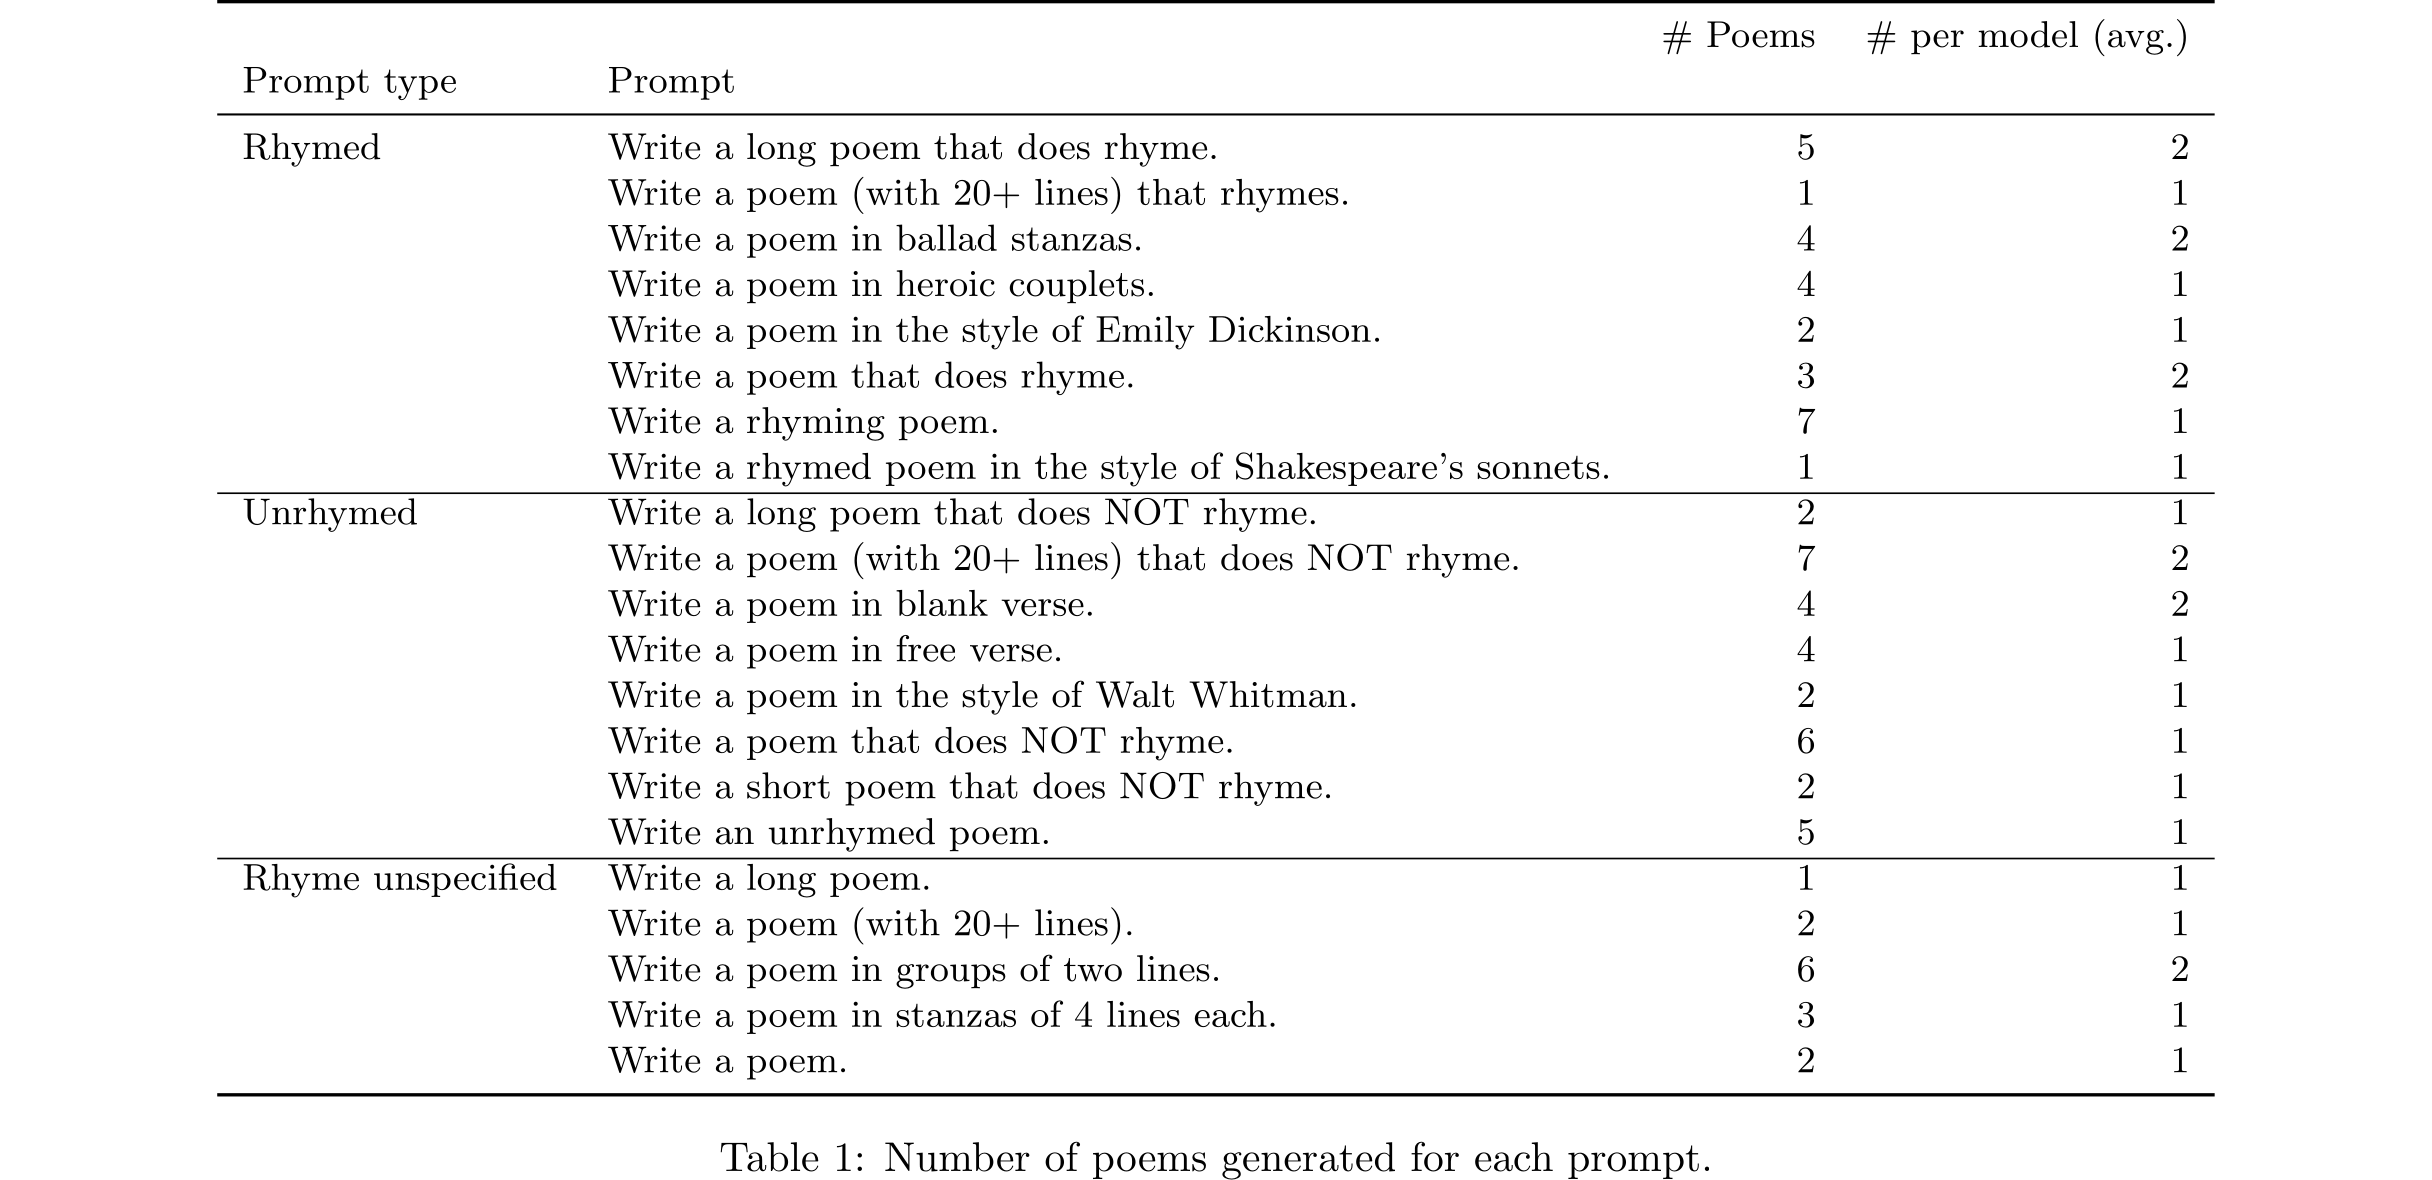

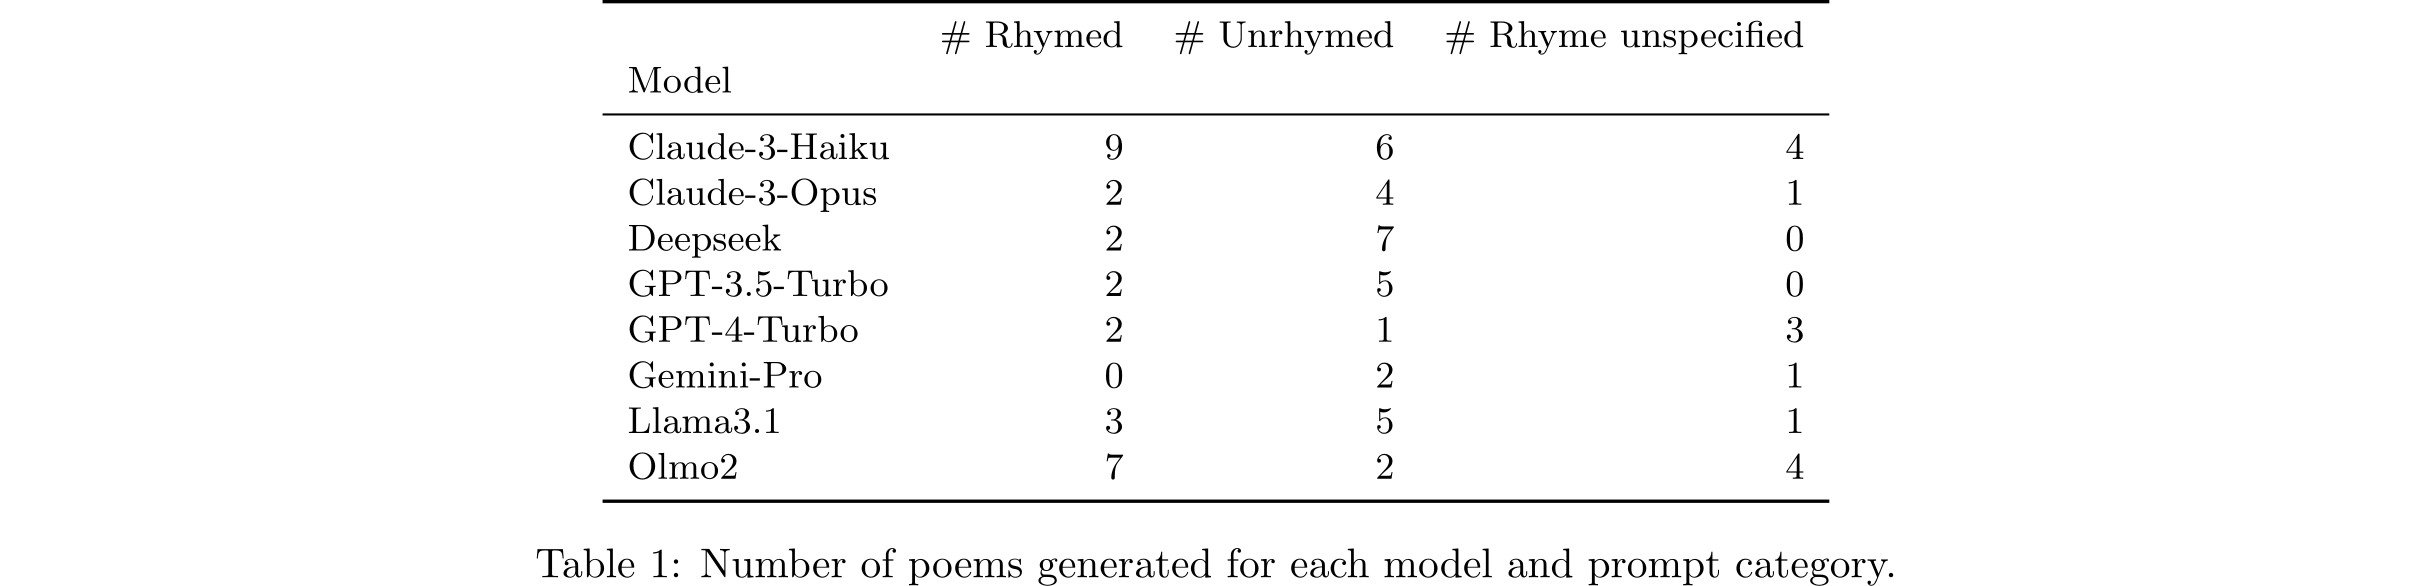

,prompt_type,prompt,model,temperature,txt,num_lines
4,DO_rhyme,Write an rhyming poem.,claude-3-haiku-20240307,0.7754,"The gentle breeze, a whisper sweet,\nCaresses ...",12
37,do_NOT_rhyme,Write a poem (with 20+ lines) that does NOT rh...,claude-3-haiku-20240307,0.9458,"In the stillness of the night,\nShadows dance ...",24
27,DO_rhyme,Write a poem in the style of Emily Dickinson.,gpt-4-turbo,0.8877,"In stillness, Nature's shyest leaf\nWill tremb...",24
6,MAYBE_rhyme,Write a poem (with 20+ lines).,claude-3-haiku-20240307,0.3689,"The wind whispers its secrets,\nCaressing the ...",24
44,do_NOT_rhyme,Write a poem (with 20+ lines) that does NOT rh...,gpt-3.5-turbo,0.4690,"In the stillness of the night, \nI lay awake, ...",31


In [ ]:
df_genai_rhyme_promptings_as_replicated = get_genai_rhyme_promptings_as_replicated(display=True)
df_genai_rhyme_promptings_as_replicated.head()

### Saving all rhyme promptings

#### Collecting genai rhyme promptings used in paper

* Collecting from /Users/rj416/github/generative-formalism/data/raw/data.allpoems.pkl.gz
  * 9081 generated poems
* Collecting from /Users/rj416/github/generative-formalism/data/raw/data.newpoems2.json.gz
  * 13337 generated poems


##### Aggregated and filtered

* 17,988 generated responses
* 16,935 unique responses
* 16,871 unique poems
* 23 unique prompts
* 3 unique prompt types


#### Collecting genai rhyme promptings used in paper

* Collecting from /Users/rj416/github/generative-formalism/data/stash/genai_rhyme_prompts.jsonl
  * 89 generated poems


##### Aggregated and filtered

* 88 generated responses
* 88 unique responses
* 88 unique poems
* 23 unique prompts
* 3 unique prompt types
* Writing LaTeX to /Users/rj416/github/generative-formalism/data/tex/table_rhyme_promptings.tex
* Rendering PNG to /Users/rj416/github/generative-formalism/data/tex/table_rhyme_promptings.png
* Writing LaTeX to /Users/rj416/github/generative-formalism/data/tex/table_num_poems_models.tex
* Rendering PNG to /Users/rj416/github/generative-formalism/data/tex/table_num_poems_models.png


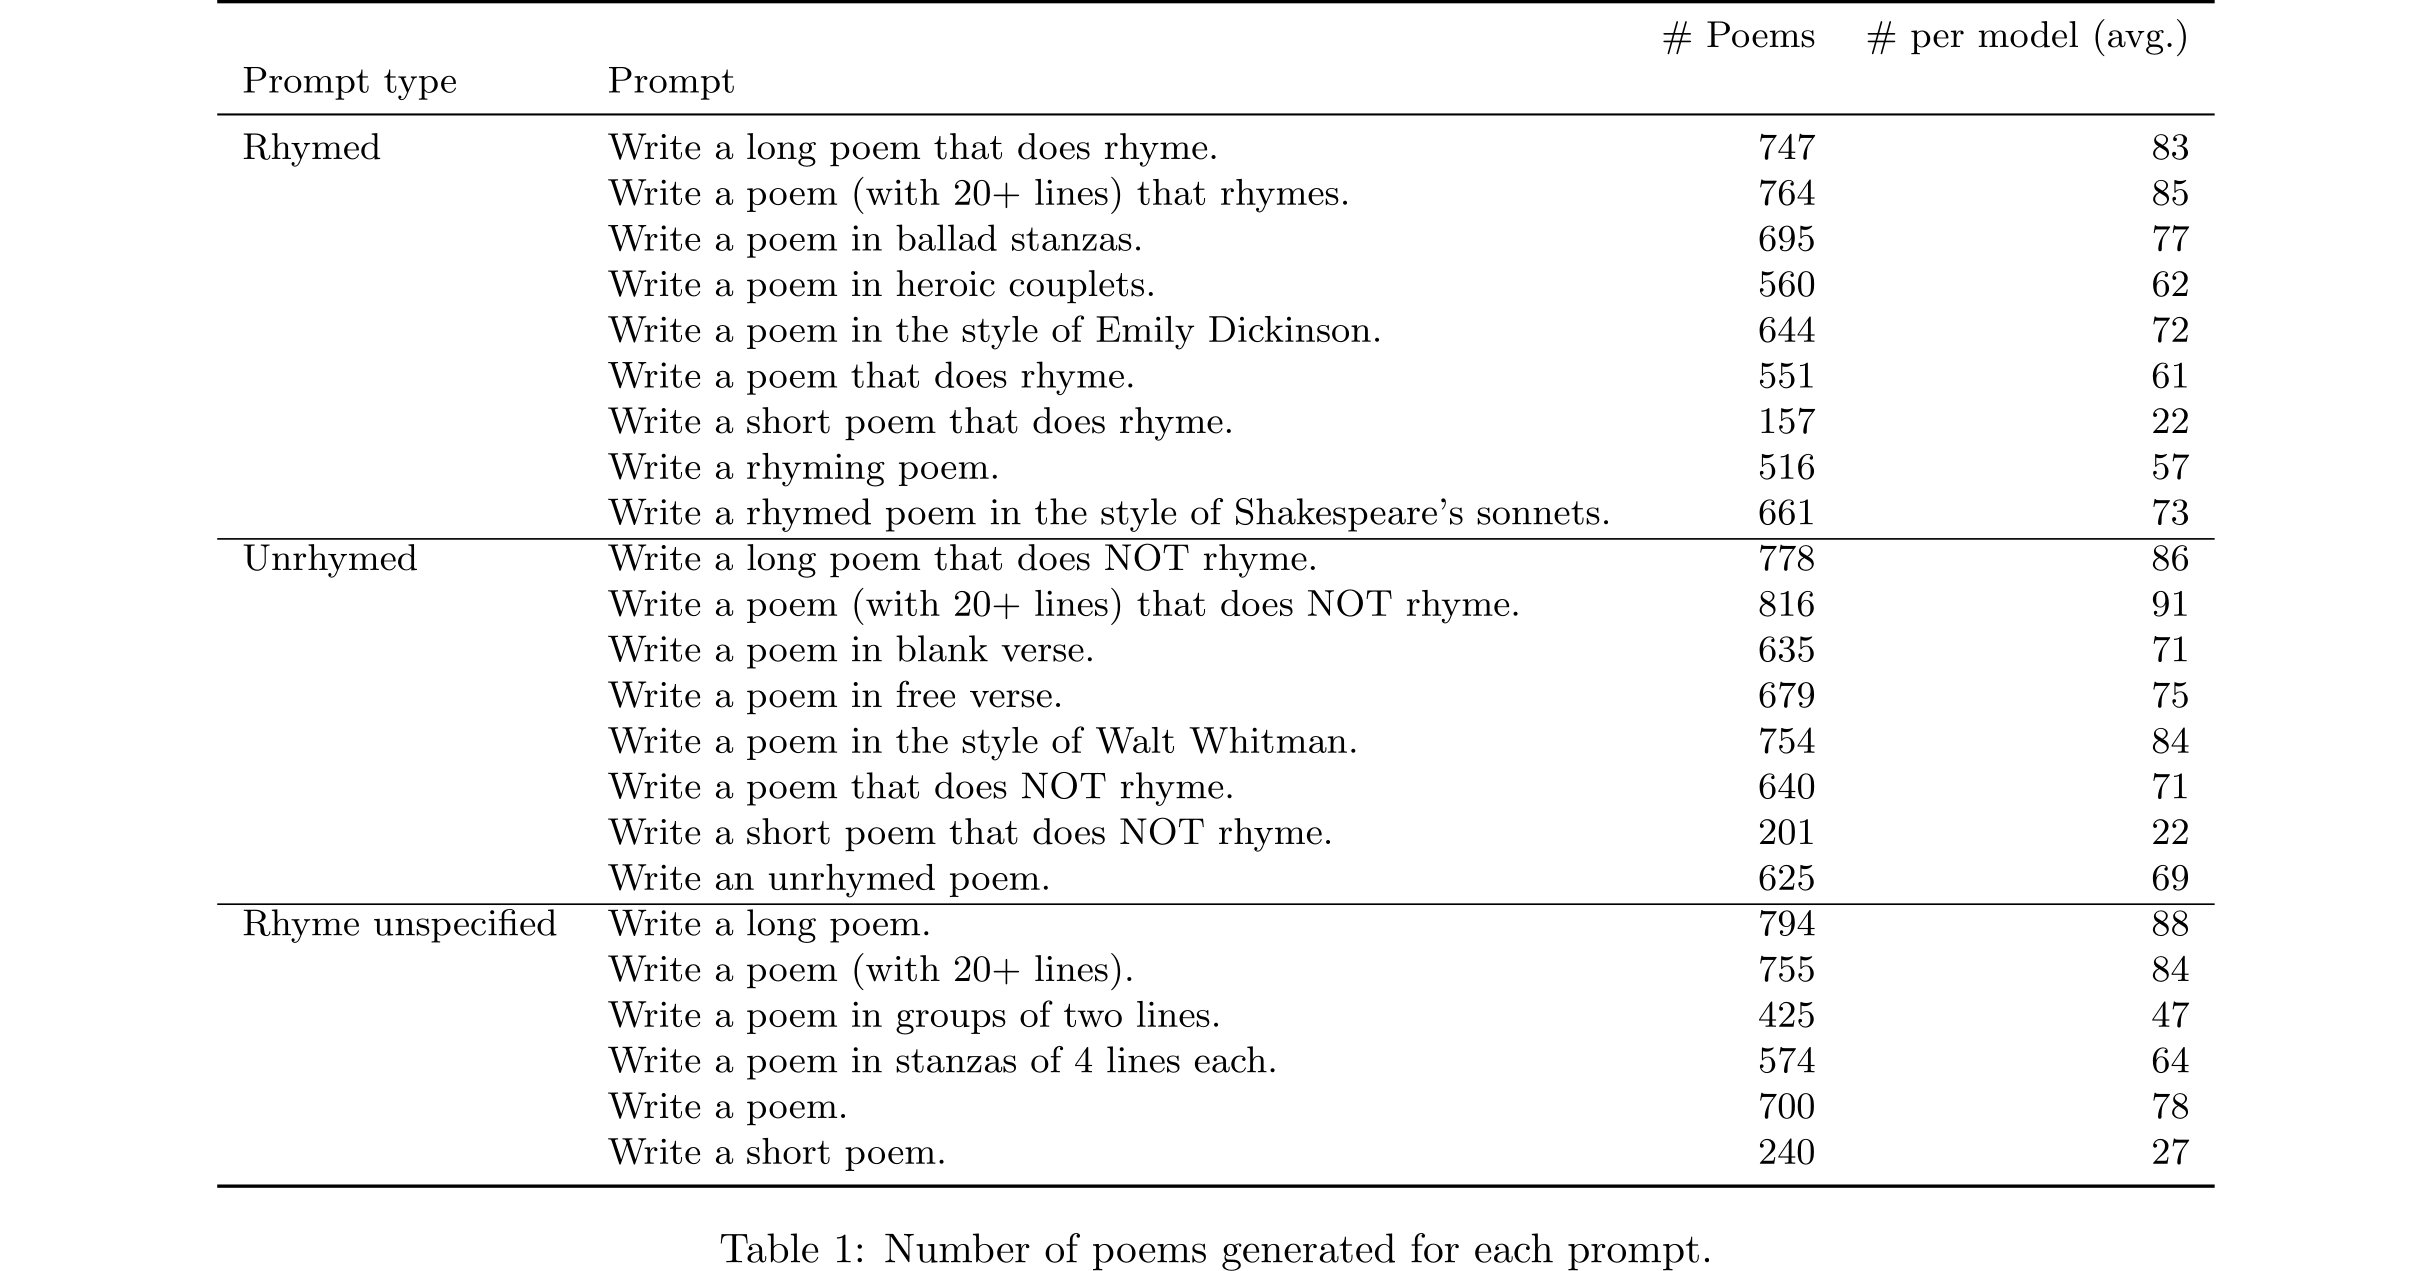

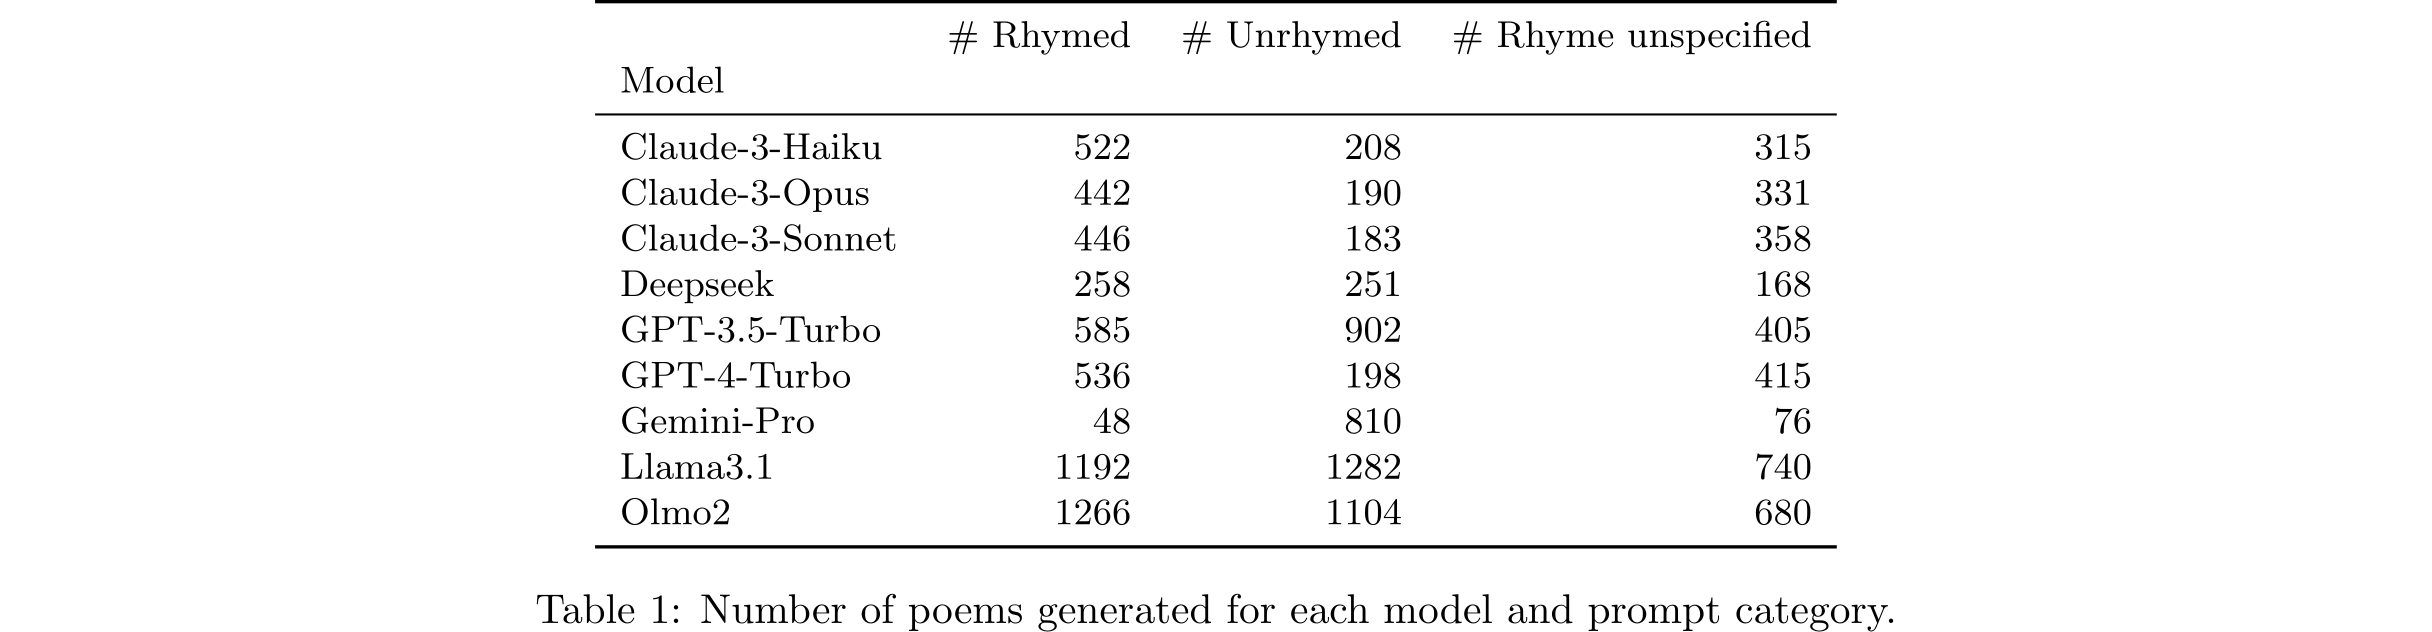

,prompt_type,prompt,model,temperature,txt,num_lines
b3d58277,do_NOT_rhyme,Write a poem in the style of Walt Whitman.,gpt-3.5-turbo,1.063488,"In the grandeur of nature's embrace,\nI walk t...",16
38b73121,do_NOT_rhyme,Write a long poem that does NOT rhyme.,claude-3-opus-20240229,0.014543,"In the depths of a forest, where shadows dance...",32
1edc96a8,do_NOT_rhyme,Write a poem in the style of Walt Whitman.,gpt-4-turbo,0.631059,"O vast and endless sprawl of life, of these Un...",32
6de74d18,DO_rhyme,Write a poem in heroic couplets.,ollama/llama3.1:8b,0.700000,"In twilight's hush, where shadows softly fall,...",12
6088b57a,MAYBE_rhyme,Write a short poem.,gpt-4-turbo,0.440209,"In the quiet whispers of the dawn,\nWhere shad...",16
...,...,...,...,...,...,...
16,MAYBE_rhyme,Write a poem in groups of two lines.,gpt-4-turbo,0.402500,"Beneath the vast, unending sky, so blue, \nWh...",12
57,DO_rhyme,Write an rhyming poem.,claude-3-haiku-20240307,0.382200,"The sun shines bright, the sky so blue,\nA gen...",12
45,DO_rhyme,Write a poem in ballad stanzas.,ollama/olmo2:13b,0.260300,"In the hush of the night, when the moon hangs ...",28
18,DO_rhyme,Write a poem in ballad stanzas.,claude-3-haiku-20240307,0.622300,"The roads stretch long, the paths wind far,\nM...",12


In [ ]:
df_all_rhyme_promptings = get_all_genai_rhyme_promptings(display=True)
df_all_rhyme_promptings